### Import libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

### Obtaining Data

We aim to predict the purchasing behaviour of people whom have been subject to a social media marketing advertisement campaign. 

In [11]:
# Load the data into a pandas dataframe  
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Check the shape of the data

In [12]:
data.shape

(400, 5)

Check overall summary using info() and check if any missing values? 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [14]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Predicting a categorical target variable with Linear Regression

#### Exercise: 
- extract the column 'Purchased' as target variable
- put in a variable 'y'

In [16]:
y=data['Purchased']

#### Exercise: 
- extract the columns of input variables, a slice from column "Gender" to column "EstimatedSalary"
- put in a variable 'x_orig'

In [17]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [47]:
x_orig= data.iloc[:,1:4]

#### Detour: Encoding Non-Numeric Variables

Note that the `Gender` column is a categorical variable. For scikit-learn library's LinearRegression(), this is problematic as the data must be entirely numeric.

Let's convert the values to 0 or 1. This is known as *encoding*.

- Male is transformed to 0
- Female is represented by 1

In [56]:
# make a copy of the original dataframe before encoding
x_encoded=x_orig.copy()


In [58]:
map={}
for i,category in enumerate(np.unique(x_encoded.iloc[:,0])):
    map[category]=i
x_encoded['Gender']=x_encoded['Gender'].map(map)

In [59]:
x_encoded

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


Let's now visualise the data comparing each category of "Purchased" against the input values

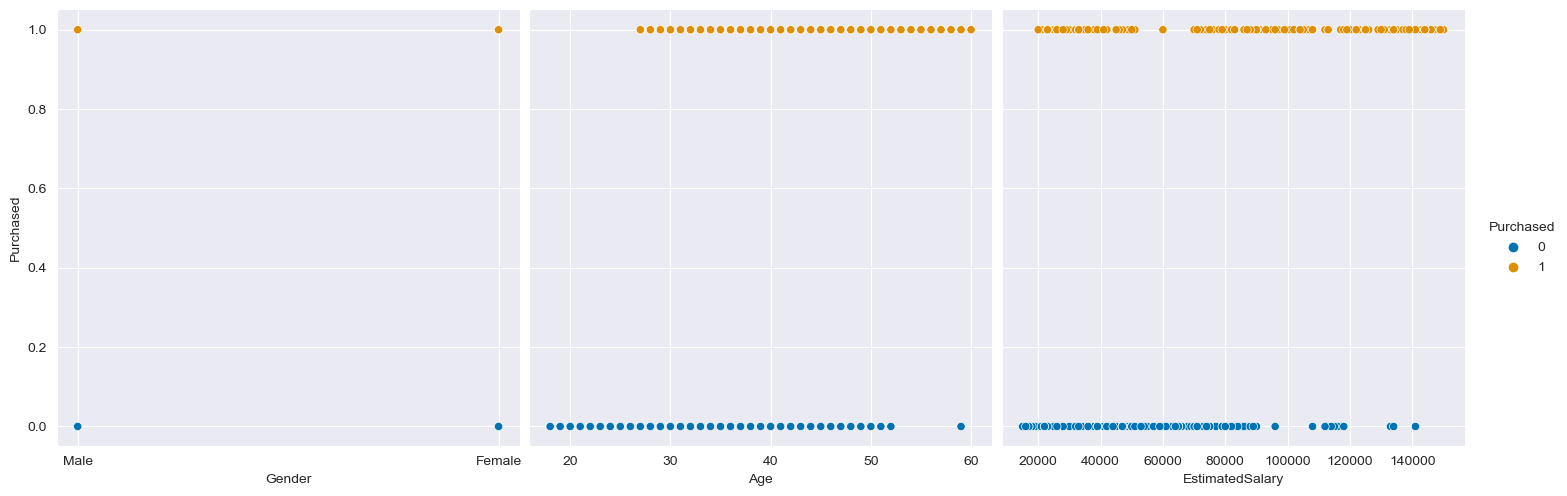

In [60]:
sns.pairplot(data,hue="Purchased",palette="colorblind", 
             x_vars = x_encoded.columns, y_vars = ["Purchased"], 
             height = 5, diag_kind=None)

Observation

- people might be more likely to purchase the insurance if they are older and have a higher salary
- The plot for `Gender` does not give any insight

#### Detour: Scaling Variables

EstimatedSalary variable is much larger in magnitude compared to other numerical variables. Having such a large disparity may cause computational issues. Let's scale the EstimatedSalary variable so that the magnitudes are similar.

A simple way would be to just divide it by a constant value. There are much better methods of scaling but beyond our scope.

In [61]:
# Scale the values of EstimatedSalary by 1000
x_encoded['EstimatedSalary']=x_encoded['EstimatedSalary']/1000

In [62]:
x_encoded.head()

,Gender,Age,EstimatedSalary
0,1,19,19.0
1,1,35,20.0
2,0,26,43.0
3,0,27,57.0
4,1,19,76.0


### Binary Classification using Linear Regression

#### Separate the data set into train vs. test subsets

In [63]:
from sklearn.model_selection import train_test_split
random_state=12345
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=random_state)
# random_state is a seed used to take the random sample
# Fixing the random_state will ensure that the 'random' sampling gives 
# the same training and testing data set each time the code is run

In [64]:
x_train.head()

,Gender,Age,EstimatedSalary
262,0,55,125.0
3,0,27,57.0
298,1,45,79.0
292,1,55,39.0
75,1,34,112.0


In [65]:
x_test.head()

,Gender,Age,EstimatedSalary
378,1,41,87.0
175,0,23,28.0
396,1,51,23.0
213,1,35,58.0
110,0,39,71.0


#### Fit the data to a Linear Regression model

Option 1: Use LinearRegression() from `scikit-learn`

In [66]:

from sklearn.linear_model import LinearRegression, LogisticRegression
linreg_sk = LinearRegression()
linreg_sk.fit(x_train, y_train)
print(linreg_sk.intercept_, linreg_sk.coef_)

-0.9040996420705039 [-0.02676578  0.02628559  0.00370859]


Option 2: Use ols() from `statsmodels.formula.api`

Combine x_train and y_train as one DataFrame first 

In [67]:
import statsmodels.formula.api as smf
train_data_set = pd.concat([x_train, y_train], axis=1)
train_data_set.head()

,Gender,Age,EstimatedSalary,Purchased
262,0,55,125.0,1
3,0,27,57.0,0
298,1,45,79.0,0
292,1,55,39.0,1
75,1,34,112.0,1


#### Exercise:
- use `smf.ols` to train the model
- name the model as `linreg_ols` 
- show summary

In [69]:
model = smf.ols('Purchased ~ Gender + Age + EstimatedSalary', data=train_data_set)
linreg_ols = model.fit()
print(linreg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              Purchased   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     84.90
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           6.07e-39
Time:                        19:57:44   Log-Likelihood:                -94.951
No. Observations:                 280   AIC:                             197.9
Df Residuals:                     276   BIC:                             212.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9041      0.087    -

We use option 2 `smf.ols()` model for prediction of y

In [70]:
linreg_ols_pred_train = linreg_ols.predict(x_train)
linreg_ols_pred_test = linreg_ols.predict(x_test)

Predictions given by the Linear Regression Model are numeric

In [71]:
linreg_ols_pred_train[:5]

262    1.005182
3      0.017001
298    0.544965
292    0.659477
75     0.378207
dtype: float64

How can we equate these predictions to the categorical target variable (Purchased should be 0/1)?

One method would be to plot the predictions against the target values and pick a threshold

C:\Users\final\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'predicted values'),
 Text(0, 0.5, 'target values'),
 Text(0.5, 1.0, 'Predicted vs Actual Responses')]

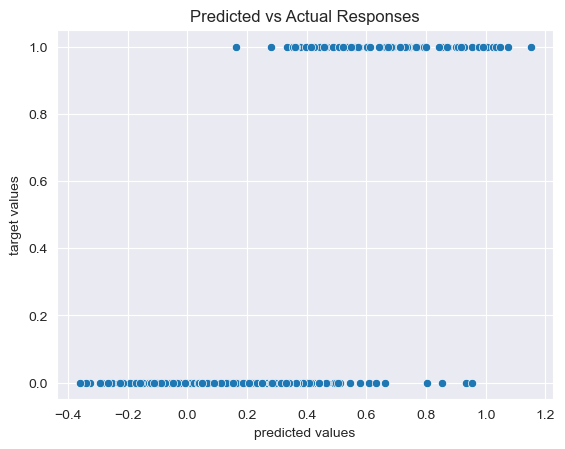

In [72]:
ax = sns.scatterplot(linreg_ols_pred_train,y_train)
ax.set(xlabel='predicted values', ylabel='target values',title="Predicted vs Actual Responses")

By eyeballing the plot above, maybe we can set threshold to 0.45.

C:\Users\final\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'predicted values'),
 Text(0, 0.5, 'target values'),
 Text(0.5, 1.0, 'Predicted vs Actual Responses')]

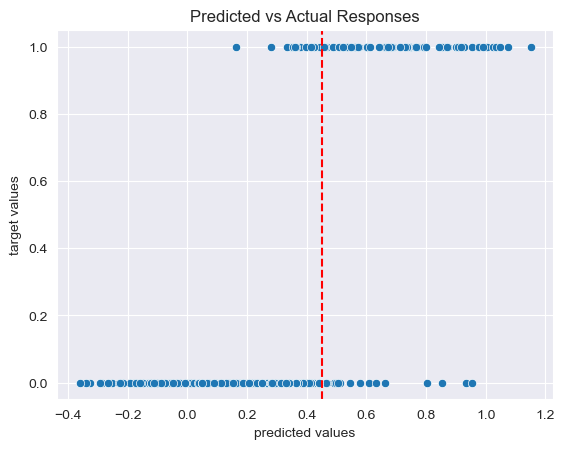

In [73]:
ax = sns.scatterplot(linreg_ols_pred_train,y_train)
plt.axvline(0.45, color="r", ls="--")
ax.set(xlabel='predicted values', ylabel='target values',title="Predicted vs Actual Responses")

We can now make the actual binary-valued prediction using our threshold:

In [74]:
# linreg_ols_pred_train > 0.45 generates a boolean Series of True/False values
# then we convert all values to 1 or 0
y_pred_train = (linreg_ols_pred_train > 0.45).astype(int)
y_pred_train

262    1
3      0
298    1
292    1
75     0
      ..
34     0
357    0
382    1
129    0
285    0
Length: 280, dtype: int32

Measure the training accuracy

In [75]:
# Measure the accuracy on the training set
acc_train = y_pred_train==y_train
print("Accuracy:", acc_train.mean())

Accuracy: 0.8857142857142857


Test this classifier on the testing data set

In [76]:
y_pred_test = (linreg_ols_pred_test > 0.45).astype(int)
acc_test = y_pred_test==y_test
print("Accuracy:", acc_test.mean())

Accuracy: 0.7916666666666666


The model performs slightly worse on the test set. Let's see a plot of the results:

C:\Users\final\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


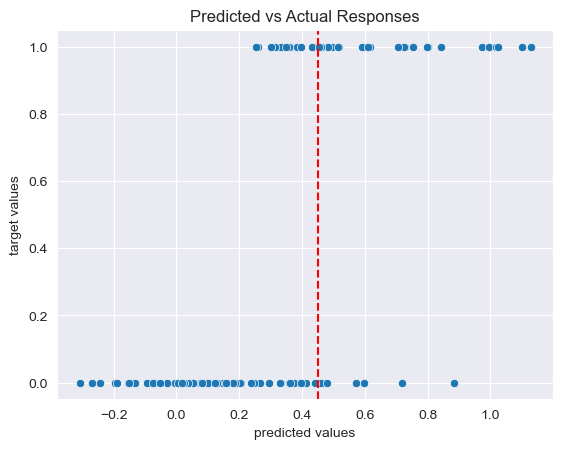

In [77]:
ax = sns.scatterplot(linreg_ols_pred_test,y_test)
plt.axvline(0.45,color="r",ls="--");
ax.set(xlabel='predicted values', ylabel='target values',title="Predicted vs Actual Responses");

Issues
- The cut-off value for regression output to be considered 1 or 0 was chosen by observation, without a guiding principle
- The Linear Regression model’s output can be (−∞,∞)

## Logistic Regression to the rescue

Plotting **sigmoid** function to see the boundaries

$$ f(z) = \frac{1}{1+e^{-z}} $$


C:\Users\final\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

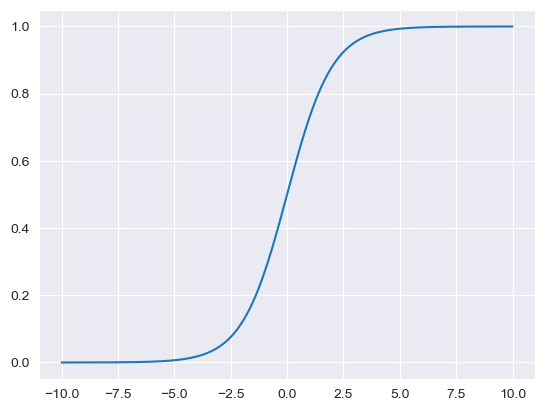

In [78]:
sigmoid_domain = np.linspace(-10, 10, num=10000)
sigmoid_range = 1/(1 + np.exp(-sigmoid_domain))
sns.lineplot(sigmoid_domain, sigmoid_range)

### Training Logistic Regression Model

Option 1: use the logistic regression model in `scikit-learn`

In [79]:
from sklearn.linear_model import LogisticRegression
logreg_sk = LogisticRegression()

logreg_sk.fit(x_train, y_train)
print(logreg_sk.intercept_, logreg_sk.coef_)

[-13.35624542] [[-0.20583208  0.24901749  0.03727925]]


Option 2: 
#### Exercise
- use the `logit()` from `statsmodels.formula.api`
- name the model result as `logreg_logit`

In [80]:
train_data_set.head()

,Gender,Age,EstimatedSalary,Purchased
262,0,55,125.0,1
3,0,27,57.0,0
298,1,45,79.0,0
292,1,55,39.0,1
75,1,34,112.0,1


In [84]:
model = smf.logit('Purchased ~ Gender + Age + EstimatedSalary', data=train_data_set)
logreg_logit = model.fit()
print(logreg_logit.summary())

Optimization terminated successfully.
         Current function value: 0.312290
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                  0.5087
Time:                        20:07:49   Log-Likelihood:                -87.441
converged:                       True   LL-Null:                       -177.99
Covariance Type:            nonrobust   LLR p-value:                 5.100e-39
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -13.3542      1.684     -7.931      0.000     -16.654     -10.054
Gender        

Use .predict() to obtain the prediction probability

In [85]:
prob_train = logreg_logit.predict(x_train)
prob_test = logreg_logit.predict(x_test)

print(prob_train)
print(prob_test)

262    0.993428
3      0.011010
298    0.639383
292    0.827962
75     0.281625
         ...   
34     0.029251
357    0.389581
382    0.942673
129    0.023226
285    0.340329
Length: 280, dtype: float64
378    0.468687
175    0.001390
396    0.494279
213    0.062779
110    0.271940
         ...   
90     0.006156
325    0.289648
46     0.011995
328    0.446699
51     0.000727
Length: 120, dtype: float64


Transforming the probability to 1 or 0, using threshold of 0.5

In [88]:
type(prob_train)

pandas.core.series.Series

In [98]:
y_pred_train = list(prob_train.round())
y_pred_test = list(prob_test.round())

### Evaluating Logistic Regression Model
#### Accuracy

Option 1: element-wise comparisons to compare `y_pred_train` to `y_train`

In [101]:
print("Training Set Accuracy:", (y_pred_train == y_train).mean())
print("Test Set Accuracy:", (y_pred_test == y_test).mean())

Training Set Accuracy: 0.875
Test Set Accuracy: 0.7416666666666667


Option 2: use the `sklearn.metrics` module

In [102]:
from sklearn import metrics
print("Training Set Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, y_pred_test))

Training Set Accuracy: 0.875
Test Set Accuracy: 0.7416666666666667


#### Limitations of Accuracy if we use it as the only metric

Let's observe the proportion of people who purchased the item in both the training and testing set

In [103]:
print(y_train.mean())
print(y_test.mean())

0.33214285714285713
0.4166666666666667


In the test set, only 42% are positive purchases. If we predict every individual did NOT purchased the insurance, the classifier is 58% accurate naturally. Hence a 74% of accuracy rate might not be too impressive.

#### The Confusion Matrix
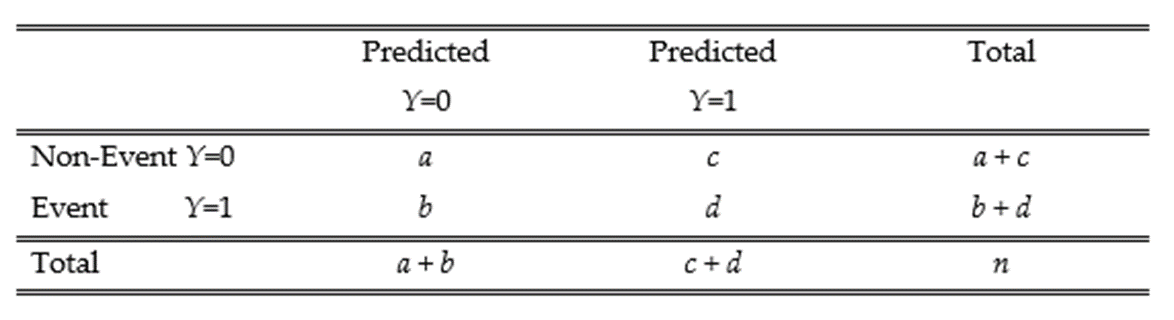

In [104]:
# first argument is true values, second argument is predicted values
cm = metrics.confusion_matrix(y_test, y_pred_test)
print(cm)

[[66  4]
 [27 23]]


Option 1: Compute the accuracy, precision and recall values from the confusion matrix **manually**

#### Exercise

In [ ]:
a = cm[0, 0]
b = ??
c = ??
d = ??

print("Accuracy Manual:", ??)
print("Precision Manual:", ??)
print("Recall Manual:", ??)

Option 2: Sklearn Implementation

In [ ]:
print("Accuracy sklearn:", metrics.accuracy_score(y_test, y_pred_test))
print("Precision sklearn:", metrics.precision_score(y_test,y_pred_test))
print("Recall sklearn:", metrics.recall_score(y_test,y_pred_test))

### How changing the classification threshold might impact the metrics of a classifier

#### Having threshold of 0.80

In [ ]:
threshold = 0.80
y_pred_test_high = (prob_test > threshold).astype(int)
y_pred_test_high

Confusion matrix for threshold of 0.80

In [ ]:
cm_threshold = metrics.confusion_matrix(y_test, y_pred_test_high)

print(cm_threshold)

metrics for threshold of 0.80

In [ ]:
print("Accuracy sklearn:", metrics.accuracy_score(y_test, y_pred_test_high))
print("Precision sklearn:", metrics.precision_score(y_test,y_pred_test_high))
print("Recall sklearn:", metrics.recall_score(y_test,y_pred_test_high))

#### Having threshold of 0.30

#### Exercise

Confusion matrix for threshold of 0.30

metrics for threshold of 0.30

In this particular example, increasing the threshold leads to

- Accuracy decreasing
- Recall decreasing
- Precision increasing

Implication for classifiers in general
- Precision and Recall usually have an inverse relationship with respect to the adjustment of the classification threshold
- Reviewing both precision and recall is useful for cases where there is a huge imbalance in the target variable’s values


### AUC (Area under ROC curve)

In [ ]:
y_test

In [ ]:
prob_test

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test)
# print(fpr, tpr, thresholds)
metrics.auc(fpr, tpr)

 ### Multinomial logistic regression
 
- Generalizes logistic regression to multiclass problems
- Decomposed as a set of independent binary logistic regressions

For student's own exploration